# [Project 3] 자동차 리콜 데이터 분석

---

## 프로젝트 목표
- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 결측치 확인 및 기초적인 데이터 변형<br>
    2.1. 결측치 확인<br>
    2.2. 중복값 확인<br>
    2.3. 기초적인 데이터 변형<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 제조사별 리콜 현황 출력<br>
    3.2. 모델별 리콜 현황 출력<br>
    3.3. 월별 리콜 현황 출력<br>
    3.4. 생산연도별 리콜 현황 출력<br>
    3.5. 4분기 제조사별 리콜 현황 출력<br>
    3.6. 하반기 생산연도별 리콜 현황 출력<br>
    3.7. 워드 클라우드를 이용한 리콜 사유 시각화<br>

---

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

---

## 프로젝트 개요

리콜(recall)은 제품의 설계, 제조 단계에서 결함이 발견되었을 시 문제 예방의 차원에서 판매자가 무상으로 수리, 점검 및 교환을 해주는 소비자 보호 제도입니다. 집집마다 개인용 자동차를 보유하게 되면서 자동차는 어느덧 우리 삶의 일상재가 되었지만, 안전성에 대해서는 산발적인 문제 제기가 계속되고 있고, 이에 따라 전격적인 자동차 리콜 사태도 종종 발생하여 화제를 모으곤 합니다.

이번 프로젝트에서는 한국교통안전공단에서 제공한 2020년 자동차 결함 리콜 데이터를 활용하여 유의미한 패턴 및 인사이트를 발굴하고 시각화하는 실습을 진행하도록 하겠습니다.

---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

### 1.1. 데이터 불러오기

In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# missingno라는 라이브러리가 설치되어 있을 경우 import
try : 
    import missingno as msno
# missingno라는 라이브러리가 설치되어 있지 않을 경우 설치 후 import
except:
    !pip install missingno
    import missingno as msno

In [2]:
import seaborn as sns

In [3]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
df = pd.read_csv("./data/한국교통안전공단_자동차결함 리콜현황_20201231.csv", encoding="euc-kr")

In [4]:
# 상위 5개 데이터를 출력합니다.
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [5]:
# 상위 10개 데이터를 출력합니다.
df.head(10)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
5,만트럭버스코리아(주),TGS 카고,2016-04-11,2016-07-21,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
6,만트럭버스코리아(주),TGS 카고,2016-04-29,2016-04-29,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
7,만트럭버스코리아(주),TGS 카고,2015-03-25,2016-04-01,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
8,만트럭버스코리아(주),TGX 트랙터,2015-03-25,2016-07-04,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
9,만트럭버스코리아(주),TGX 트랙터,2015-05-05,2016-09-15,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...


In [6]:
# 하위 5개 데이터를 출력합니다.
df.tail(10)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
1265,비엠더블유코리아(주),BMW X6 xDrive40d,2020-07-02,2020-08-29,2020-12-29,"발전기 +, - 배선 설치 공정에서의 오류로 단자의 부 정확한 고정 가능성으로 단자..."
1266,비엠더블유코리아(주),BMW X7 xDrive40d,2020-08-03,2020-09-12,2020-12-29,"발전기 +, - 배선 설치 공정에서의 오류로 단자의 부 정확한 고정 가능성으로 단자..."
1267,메르세데스벤츠코리아(주),GLC 220 d 4MATIC,2019-02-04,2019-02-05,2020-12-24,생산 공정 오류로 인하여 전조등(LED 멀티빔)의 조사 범위가 사양에 맞지 않게 설...
1268,메르세데스벤츠코리아(주),GLC 300 d 4MATIC,2019-02-05,2019-02-19,2020-12-24,생산 공정 오류로 인하여 전조등(LED 멀티빔)의 조사 범위가 사양에 맞지 않게 설...
1269,메르세데스벤츠코리아(주),GLC 300 4MATIC,2019-02-06,2019-02-12,2020-12-24,생산 공정 오류로 인하여 전조등(LED 멀티빔)의 조사 범위가 사양에 맞지 않게 설...
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274,한국닛산(주),INFINITI Q70 5.6,2014-04-08,2014-04-08,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [7]:
# dataframe 정보를 요약하여 출력합니다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1275 non-null   object
 1   차명      1275 non-null   object
 2   생산기간    1275 non-null   object
 3   생산기간.1  1275 non-null   object
 4   리콜개시일   1275 non-null   object
 5   리콜사유    1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


---

## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 중복값(duplicates)을 처리하고 열 이름 변경과 같은 기초적인 데이터 변형을 진행해봅시다.

### 2.1. 결측치 확인

`missingno.matrix()` 함수를 이용하여 결측치를 시각화해봅시다.

In [8]:
# 시각화를 위한 라이브러리와 폰트를 불러옵니다.
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

<AxesSubplot:>

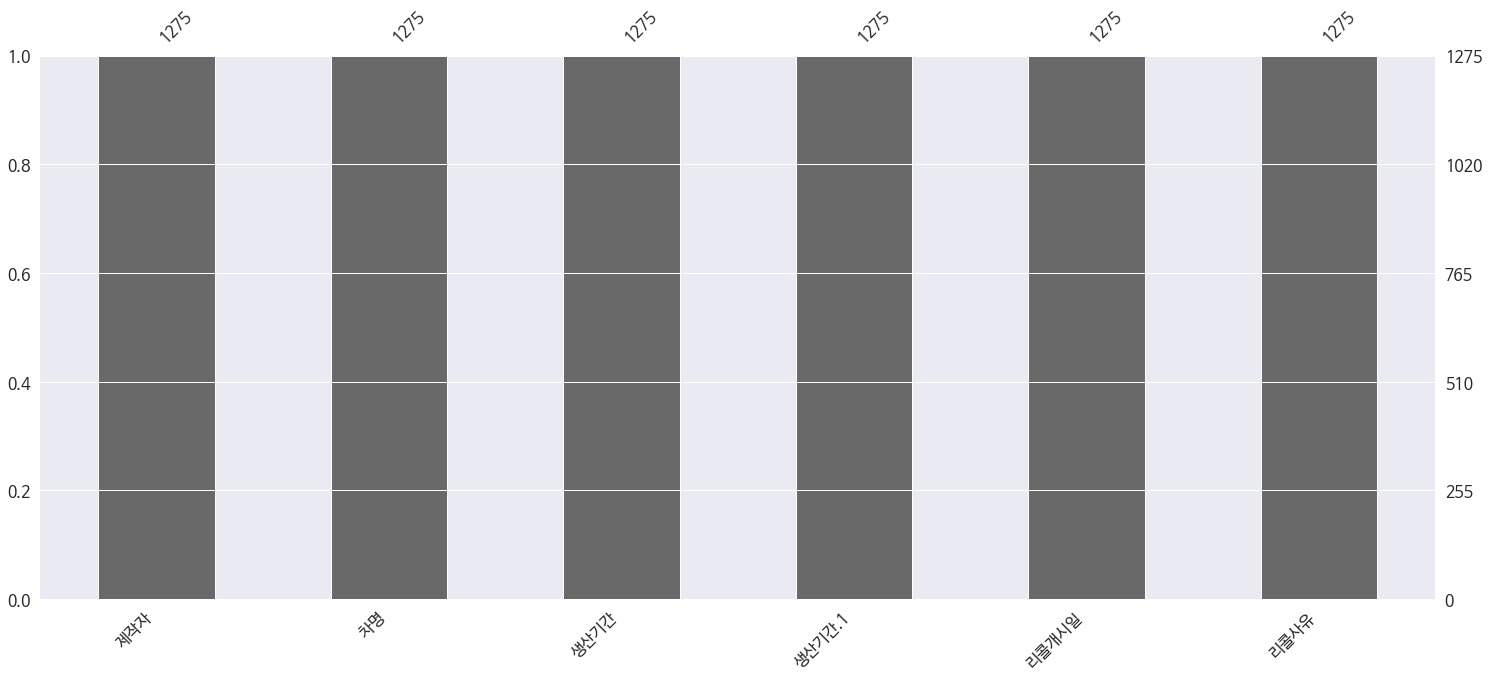

In [9]:
# 폰트를 적용하여 결측치를 시각화합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})
msno.bar(df)

`isna()` 함수를 이용하여 결측치를 확인해봅시다.

In [10]:
# 각 열 별로 결측치의 갯수를 반환합니다. (True:1, False:0)
df.isna().sum()

제작자       0
차명        0
생산기간      0
생산기간.1    0
리콜개시일     0
리콜사유      0
dtype: int64

### 2.2. 중복값 확인

`duplicated()` 함수를 이용하여 중복값을 확인해봅시다.

In [11]:
# 데이터의 중복값을 확인해보세요.
df.duplicated

<bound method DataFrame.duplicated of               제작자                 차명        생산기간      생산기간.1       리콜개시일  \
0        (주)에프엠케이             기블리 디젤  2014-05-28  2016-03-15  2020-03-23   
1        (주)에프엠케이          콰트로포르테 디젤  2014-05-08  2016-03-14  2020-03-23   
2     한국토요타자동차(주)           토요타 프리우스  2019-07-11  2019-07-31  2020-01-23   
3     한국토요타자동차(주)             토요타 캠리  2019-08-23  2019-09-06  2020-01-23   
4     한국토요타자동차(주)       토요타 캠리 하이브리드  2019-08-21  2019-09-04  2020-01-23   
...           ...                ...         ...         ...         ...   
1270      한국닛산(주)       INFINITI M30  2012-02-06  2012-02-06  2020-12-28   
1271      한국닛산(주)      INFINITI M30d  2012-07-18  2013-06-28  2020-12-28   
1272      한국닛산(주)  INFINITI Q70 3.0d  2013-09-18  2015-06-23  2020-12-28   
1273      한국닛산(주)       INFINITI M56  2010-05-25  2011-11-23  2020-12-28   
1274      한국닛산(주)   INFINITI Q70 5.6  2014-04-08  2014-04-08  2020-12-28   

                                                 

`drop_duplicates()` 함수를 이용하여 중복값을 제거합니다.

In [12]:
# 중복값을 제거합니다.
df_drop = df.drop_duplicates()
df_drop

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


### 2.3. 기초적인 데이터 변형

현재 `생산기간`, `생산기간.1`, `리콜개시일` 열은 모두 `object` 타입, 즉 문자열로 인식되고 있습니다. 분석을 위해 연도, 월, 일을 각각 정수형으로 저장합니다. <br>
추가적으로 분석의 편리를 위해 열 이름을 영어로 바꿔줍니다.

In [13]:
# 년/월/일별로 apply()를 적용할 함수를 선언합니다.
df["start_year"] = df["생산기간"].apply(lambda x: int(x.split("-")[0]))
df["start_month"] = df["생산기간"].apply(lambda x: int(x.split("-")[1]))
df["start_day"] = df["생산기간"].apply(lambda x: int(x.split("-")[2]))

df["start1_year"]= df["생산기간.1"].apply(lambda x: int(x.split("-")[0]))
df["start1_month"]= df["생산기간.1"].apply(lambda x: int(x.split("-")[1]))
df["start1_day"]= df["생산기간.1"].apply(lambda x: int(x.split("-")[2]))

df["recall_year"]= df["리콜개시일"].apply(lambda x: int(x.split("-")[0]))
df["recall_month"]= df["리콜개시일"].apply(lambda x: int(x.split("-")[1]))
df["recall_day"]= df["리콜개시일"].apply(lambda x: int(x.split("-")[2]))

# Pandas DataFrame에서는 row별로 loop를 도는 것이 굉장히 느리기 때문에, apply() 함수를 이용하여 벡터 연산을 진행합니다.


In [14]:
# 불필요한 열은 버리고, 열 이름을 재정의합니다.
df_20 = df.drop(columns=["생산기간", "생산기간.1", "리콜개시일"])

본 분석에서는 2020년의 데이터만을 대상으로하므로, 그 외의 데이터가 있다면 삭제해주겠습니다.

In [15]:
# 2019년의 데이터가 함께 존재함을 알 수 있습니다.
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   제작자           1275 non-null   object
 1   차명            1275 non-null   object
 2   리콜사유          1275 non-null   object
 3   start_year    1275 non-null   int64 
 4   start_month   1275 non-null   int64 
 5   start_day     1275 non-null   int64 
 6   start1_year   1275 non-null   int64 
 7   start1_month  1275 non-null   int64 
 8   start1_day    1275 non-null   int64 
 9   recall_year   1275 non-null   int64 
 10  recall_month  1275 non-null   int64 
 11  recall_day    1275 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 119.7+ KB


In [16]:
# 2020년의 데이터만을 남겨줍니다.
df_20 = df_20[df_20["start_year"]==2020]
df_20

,제작자,차명,리콜사유,start_year,start_month,start_day,start1_year,start1_month,start1_day,recall_year,recall_month,recall_day
123,현대자동차(주),GV80(JX),GV80 스마트스트림 D3.0 엔진 장착 차량에서 공회전 제한 시스템(ISG) 로직...,2020,1,7,2020,2,11,2020,2,27
305,아우디폭스바겐코리아(주),Q5 40 TDI qu./ Premium,"특정 기간 동안 생산/수입된 일부 차량에 탑재된 좌석 안전 벨트 경고 기능 중, 2...",2020,2,5,2020,3,5,2020,3,18
307,아우디폭스바겐코리아(주),Q5 50 TDI qu. Premium,"특정 기간 동안 생산/수입된 일부 차량에 탑재된 좌석 안전 벨트 경고 기능 중, 2...",2020,2,28,2020,2,29,2020,3,18
310,현대자동차(주),GV80 (JX1),원격 스마트 주차 보조 기능(RSPA) 고장 감지 시 필요한 차량 제어 로직 미흡으...,2020,1,7,2020,2,18,2020,4,20
313,비엠더블유코리아(주),BMW 840d xDrive,안전벨트 버클을 생산하는 과정에서의 생산오류(센서의 배선이 설계된 것 보다 짧게 연...,2020,2,10,2020,3,3,2020,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,비엠더블유코리아(주),BMW X5 xDrive40d,"발전기 +, - 배선 설치 공정에서의 오류로 단자의 부 정확한 고정 가능성으로 단자...",2020,6,14,2020,8,25,2020,12,29
1263,비엠더블유코리아(주),BMW X5 xDrive40i,"발전기 +, - 배선 설치 공정에서의 오류로 단자의 부 정확한 고정 가능성으로 단자...",2020,8,7,2020,8,14,2020,12,29
1264,비엠더블유코리아(주),BMW X6 xDrive30d,"발전기 +, - 배선 설치 공정에서의 오류로 단자의 부 정확한 고정 가능성으로 단자...",2020,8,12,2020,9,28,2020,12,29
1265,비엠더블유코리아(주),BMW X6 xDrive40d,"발전기 +, - 배선 설치 공정에서의 오류로 단자의 부 정확한 고정 가능성으로 단자...",2020,7,2,2020,8,29,2020,12,29


---

## 3. 데이터 시각화

각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다.

### 3.1. 제조사별 리콜 현황 출력

제조사별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [17]:
# 제조사별 리콜 건수를 정렬합니다.
td = df.groupby("제작자").count()["차명"].sort_values(ascending=False)

In [18]:
# 정렬한 데이터를 DataFrame으로 만드세요.
tmp= pd.DataFrame(td)

In [19]:
# 만든 DataFrame을 변수에 저장합니다.
tmp

,차명
제작자,
비엠더블유코리아(주),527
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
화창상사(주),25
기아자동차(주),19


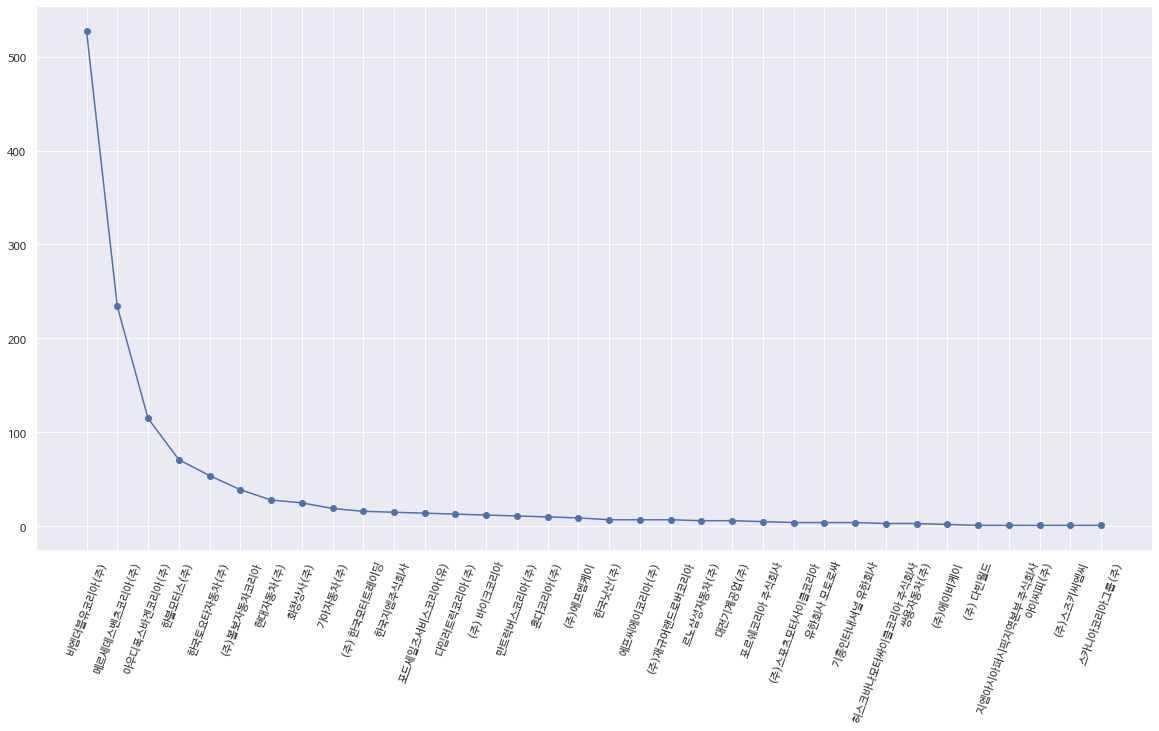

In [20]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=70)
plt.plot(tmp, 'o-')
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [21]:
# 변수에 저장한 DataFrame의 index를 확인해봅니다.
tmp.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '한불모터스(주)',
       '한국토요타자동차(주)', '(주)볼보자동차코리아', '현대자동차(주)', '화창상사(주)', '기아자동차(주)',
       '(주) 한국모터트레이딩', '한국지엠주식회사', '포드세일즈서비스코리아(유)', '다임러트럭코리아(주)',
       '(주) 바이크코리아', '만트럭버스코리아(주)', '혼다코리아(주)', '(주)에프엠케이', '한국닛산(주)',
       '에프씨에이코리아(주)', '(주)재규어랜드로버코리아', '르노삼성자동차(주)', '대전기계공업(주)',
       '포르쉐코리아 주식회사', '(주)스포츠모터사이클코리아', '유한회사 모토로싸', '기흥인터내셔널 유한회사',
       '허스크바나모터싸이클코리아 주식회사', '쌍용자동차(주)', '(주)에이비케이', '(주) 다빈월드',
       '지엠아시아퍼시픽지역본부 주식회사', '아이씨피(주)', '(주)스즈키씨엠씨', '스카니아코리아그룹(주)'],
      dtype='object', name='제작자')

### 3.2. 모델별 리콜 현황 출력

차량 모델별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [70]:
# 모델별 리콜 건수 데이터를 출력해봅니다.
models = df_20.groupby("차명").count()["제작자"]
models = pd.DataFrame(models)
models = models.rename(columns={"제작자":"count"})

모델은 굉장히 많으므로, 상위 50개 모델만 뽑아서 시각화를 진행해보겠습니다.

In [71]:
# 모델별 리콜 건수의 상위 50개의 데이터를 뽑습니다.
models.index.name = "model"
models = models.iloc[:50]

<function matplotlib.pyplot.show(close=None, block=None)>

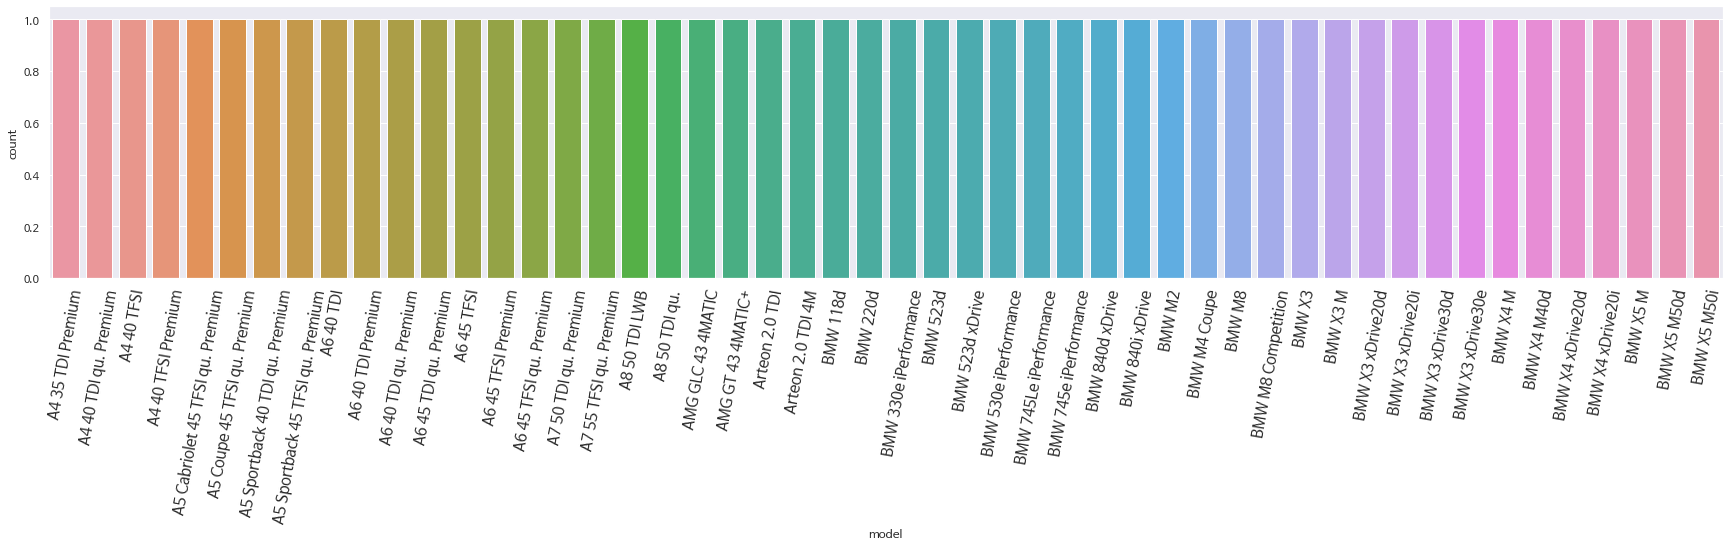

In [73]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(30,5))
plt.xticks(rotation=80, fontsize=15)
# seaborn의 countplot 함수를 사용하여 출력합니다.
ax = sns.countplot(x=models.index, data = df[df["제작자"].isin(models.index)], order=models.index)
plt.show

### 3.3. 월별 리콜 현황 출력

월별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [ ]:
# 월별 리콜 건수 데이터 프레임을 확인해봅니다.


In [ ]:
# 그래프의 사이즈를 조절합니다.

# seaborn의 countplot 함수를 사용하여 출력합니다.


### 3.4. 생산연도별 리콜 현황 출력

이번에는 생산연도별 리콜 현황을 꺾은선 그래프로 알아보겠습니다.

In [ ]:


# 그래프의 사이즈를 조절합니다.


# seaborn의 countplot 함수를 사용하여 출력합니다.


In [ ]:
# 생산연도별 리콜 현황 데이터를 확인해봅니다.


#### 퀴즈 1. 2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)를 구하세요.

In [ ]:
# tmp = pd.DataFrame(df.groupby("recall_month").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"})
# tmp.iloc[0]["count"]-tmp.iloc[-1]["count"]

In [ ]:
# 퀴즈의 답을 구하여 quiz_1 변수에 저장합니다.
# integer 형 상수값으로 저장합니다.


### 3.5. 4분기 제조사별 리콜 현황 출력

가장 최근 데이터인 2020년 4분기(10, 11, 12월) 제조사별 리콜 현황을 시각화해봅시다.

In [ ]:
# 논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있습니다.


In [ ]:
# 그래프를 출력합니다.


### 3.6. 하반기 생산연도별 리콜 현황 출력

이번에는 2020년 하반기(7~12월)에 개시된 리콜 건들을 생산 개시 연도를 기준으로 시각화해봅시다.

In [ ]:
# 해당 column을 지정하여 series 형태로 출력할 수 있습니다.


In [ ]:
# 그래프를 출력합니다.


### 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

워드 클라우드를 이용하여 리콜 사유를 시각화해보도록 하겠습니다.

In [ ]:
# 워드 클라우드 생성을 도와주는 패키지를 가져옵니다.


In [ ]:
# 문법적인 성분들을 배제하기 위해 stopwords들을 따로 저장해둡니다.


영어를 사용할 때는 상관 없지만, 우리말을 쓸 때에는 적합하지 않습니다. 여기서는 예시로 몇 개의 stopwords들을 수기로 저장해보겠습니다.

In [ ]:
# 손으로 직접 리콜 사유와 관련이 적은 문법적 어구들을 배제해보겠습니다.


In [ ]:
# 리콜 사유에 해당하는 열의 값들을 중복 제거한 뒤 모두 이어붙여서 text라는 문자열로 저장합니다.


워드 클라우드를 생성하고 시각화해보겠습니다.

In [ ]:
# 한글을 사용하기 위해서는 폰트를 지정해주어야 합니다.


#### 퀴즈 2. 기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명을 구하세요. 

In [ ]:
# df[df['manufacturer']=="기아자동차(주)"].sort_values(by=["recall_year", "recall_month", "recall_day"], ascending=False).iloc[0]['model']

In [ ]:
# 퀴즈의 답을 구하여 quiz_2 변수에 저장합니다.
# 문자형으로 저장합니다.


 ---